### In this Jupyter file we will analyse `Exploratory Data Analysis (EDA)`

In [3]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
import matplotlib.pyplot as plt
from steps.plot import circle_draw,bar_plot,circle_analysis
from steps.preprocess import missing_value,numerical_conversion,binary_conversion,standard_scaling



Pandas has a built-in function to read .csv files called read_csv() which takes the file pathname of your .csv file. You'll likely use this a lot.

In [4]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
analysis_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Let's see how's our data look like

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Churn Distribution

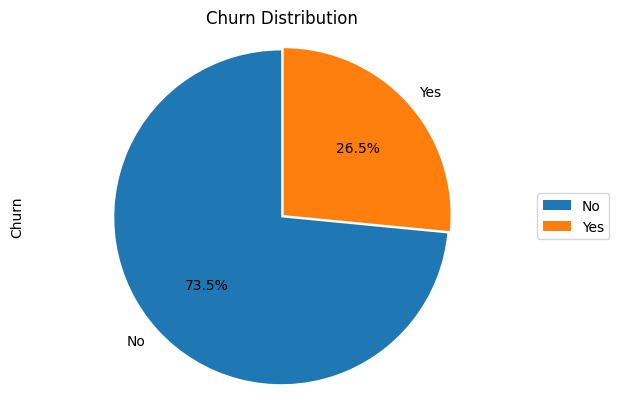

In [6]:
circle_draw(data_series=data['Churn'],title='Churn Distribution')

Here we found Churn-Rate No is 73.5% and Yes is 26.5%

## Gender Distribution

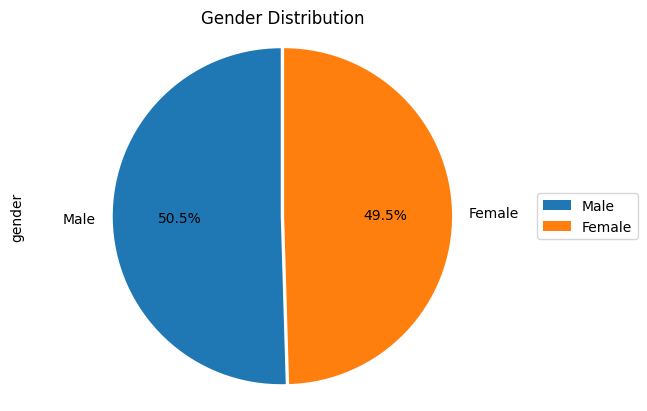

In [7]:
circle_draw(data_series=data['gender'],title='Gender Distribution')

We Found 50% are male and 49.5% are Female

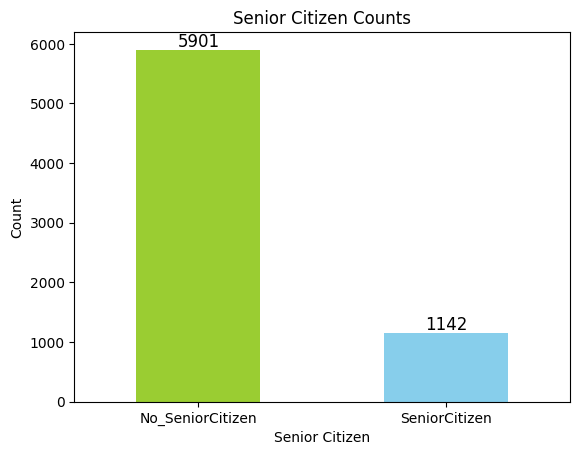

In [8]:
## Senior Citizens Counts
data['SeniorCitizen'] = data['SeniorCitizen'].replace({0: 'No_SeniorCitizen', 1: 'SeniorCitizen'})

bar_plot(data_series=data['SeniorCitizen'],xlabel='Senior Citizen',ylabel='Count',title='Senior Citizen Counts',colors=['Yellowgreen','skyblue'])


We found 1142 are Senior Citizen and 5901 are young Adults

We found 55% are Month-to-Month subscription while for whole year is 20.9% and 24.1% for Two year

### Payment Method

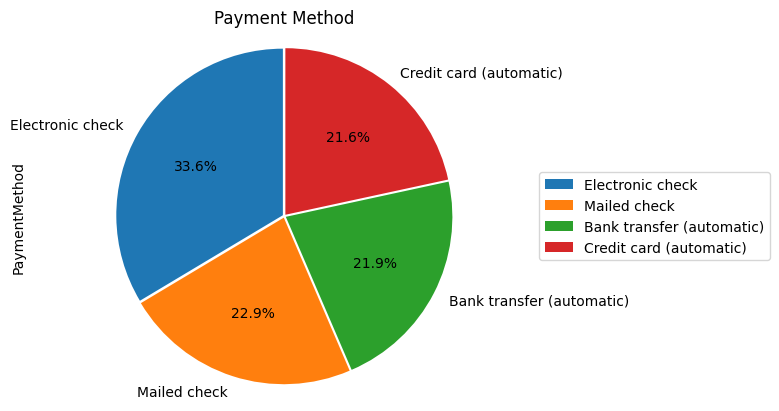

In [9]:
circle_draw(data_series=data['PaymentMethod'],title='Payment Method')

### Types of Internet Services

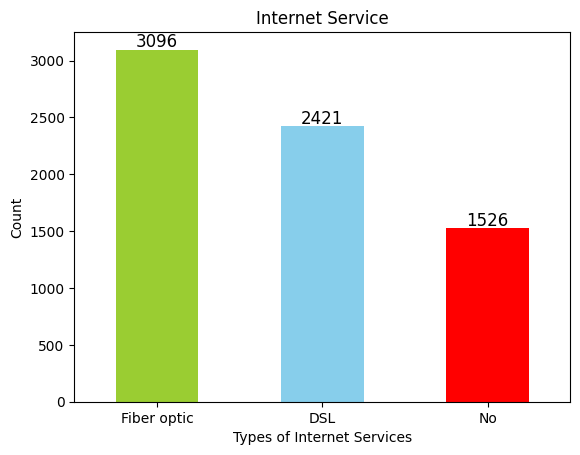

In [10]:
bar_plot(data_series=data['InternetService'],xlabel='Types of Internet Services',ylabel='Count',title='Internet Service',colors=['Yellowgreen','skyblue','red'])


#### Lets do data Corelation

#### Here we are doing Numerical Encodinng so we can find the corelation between column and target class

In [11]:
binary_conversion(data=data)
numerical_conversion(data=data)

#### Normalization Technique - `StandardScaling` here we used this normalization technique , we can also used `MinMaxScaleing`

In [ ]:
standard_scaling(data=data)

In [12]:
data.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.007504,-0.002081,0.002445,...,-0.008744,-0.004115,-0.009444,-0.014674,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.000485,-0.010380,-0.003429,...,0.005092,0.000985,0.001156,-0.000191,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.099883,0.259390,-0.210897,...,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.090981,-0.000132,0.081850,...,0.094451,0.069072,0.080127,0.075779,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.016875,-0.179631,0.190523,...,0.156439,0.180832,0.140395,0.125820,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.242279,0.033230,0.145298,...,0.178649,0.144459,0.136145,0.140781,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.691070,0.093720,0.125353,...,0.138755,0.123350,0.171538,0.165205,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.007504,-0.000485,0.099883,0.090981,-0.016875,0.242279,-0.691070,1.000000,0.174989,-0.235021,...,-0.200463,-0.232155,-0.202414,-0.195815,0.078613,0.108230,-0.124982,0.146153,0.026847,0.019423
InternetService,-0.002081,-0.010380,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.174989,1.000000,-0.764943,...,-0.682448,-0.760985,-0.617704,-0.620005,-0.290189,0.378108,-0.120971,0.905491,0.219752,0.316846
OnlineSecurity,0.002445,-0.003429,-0.210897,0.081850,0.190523,0.145298,0.125353,-0.235021,-0.764943,1.000000,...,0.749040,0.791225,0.701976,0.704984,0.389978,-0.334003,0.046811,-0.621227,-0.110337,-0.332819


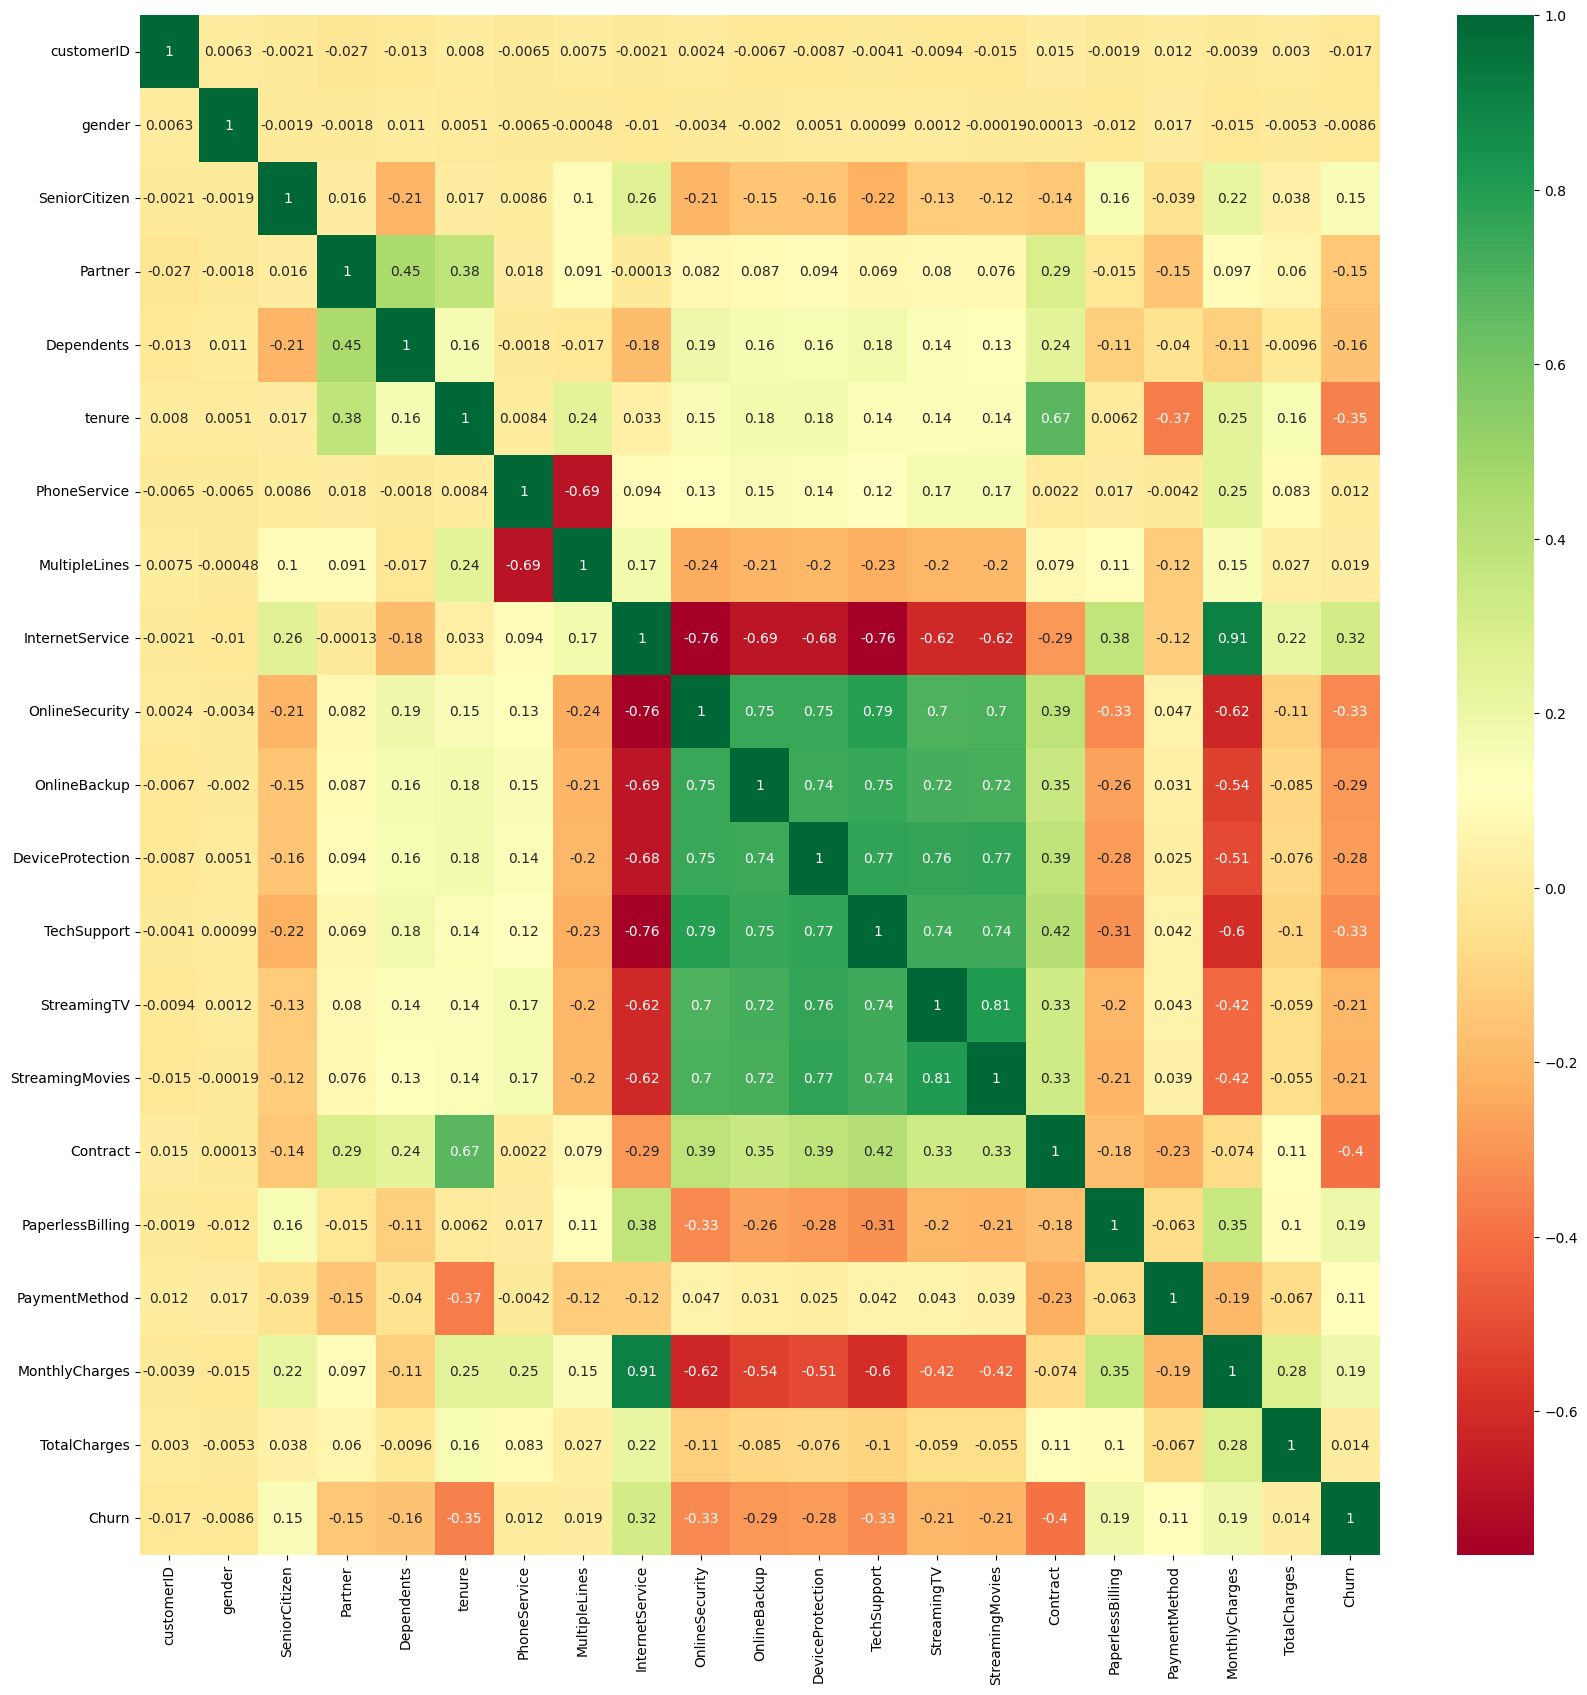

In [13]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

-> 1: Perfect positive correlation. When one variable increases, the other variable also increases proportionally.

-> 0: No correlation. There's no linear relationship between the variables.

-> -1: Perfect negative correlation. When one variable increases, the other variable decreases proportionally.

-> Darker shades indicate stronger correlations (either positive or negative).

-> Closer to 1 or -1 indicates a stronger relationship, whereas values closer to 0 signify weaker or no relationship.  

-> This suggests an inverse relationship between those variables. For instance, if one variable represents customer satisfaction and another represents churn, a negative correlation would suggest that higher satisfaction is associated with lower churn rates


In [14]:
matrix = data.corr()
target_column = matrix['Churn']
Churn_rate_df = pd.DataFrame(data.columns,target_column)
Churn_rate_df

,0
Churn,
-0.017447,customerID
-0.008612,gender
0.150889,SeniorCitizen
-0.150448,Partner
-0.164221,Dependents
-0.352229,tenure
0.011942,PhoneService
0.019423,MultipleLines
0.316846,InternetService


#### Let's Analyse it



## Feature Correlations with Churn:

1. **CustomerID (-0.017447)**:
   - *Insight*: The customer ID demonstrates no significant correlation with churn. It serves as an identifier and doesn't influence customer churn behavior.


2. **Gender (-0.008612)**:
   - *Insight*: Gender showcases minimal correlation with churn. It suggests that gender doesn't play a substantial role in influencing customers' decisions to churn.


3. **SeniorCitizen (0.150889)**:
   - *Insight*: There's a slight positive correlation between being a senior citizen and churn. This could indicate differing needs or preferences among older customers.


4. **Partner (-0.150448)**, **Dependents (-0.164221)**:
   - *Insight*: Having a partner or dependents exhibits a moderate negative correlation with churn. Family-oriented customers tend to stay longer with the service.


5. **Tenure (-0.352229)**:
   - *Insight*: Strongly negatively correlated. Longer-tenured customers exhibit significantly lower churn rates, emphasizing the importance of retaining established clientele.


6. **PhoneService (0.011942)**, **MultipleLines (0.019423)**:
   - *Insight*: Both display negligible positive correlations with churn, suggesting that having phone service or multiple lines has minimal impact on churn rates.


7. **InternetService (0.316846)**:
   - *Insight*: Shows a notable positive correlation. Customers with internet service, particularly Fiber Optic, are more likely to churn compared to other types.


8. **OnlineSecurity (-0.332819)**, **OnlineBackup (-0.291449)**, **DeviceProtection (-0.281465)**, **TechSupport (-0.329852)**:
   - *Insight*: Negative correlations imply that customers with additional services like online security, backup, device protection, or tech support are less likely to churn.


9. **StreamingTV (-0.205742)**, **StreamingMovies (-0.207256)**:
   - *Insight*: Moderate negative correlations highlight that customers using streaming services tend to exhibit lower churn rates.


10. **Contract (-0.396713)**:
    - *Insight*: Strongly negatively correlated. Long-term contracts significantly reduce churn rates compared to more flexible month-to-month contracts.


11. **PaperlessBilling (0.191825)**, **PaymentMethod (0.107062)**, **MonthlyCharges (0.193356)**, **TotalCharges (0.014479)**:
    - *Insight*: Slight positive correlations suggest that paperless billing, specific payment methods, higher monthly or total charges slightly elevate churn rates.
    

These correlations offer valuable insights into customer behavior, helping businesses tailor retention strategies focused on tenure, contract types, service subscriptions, and billing preferences to reduce churn rates and enhance customer loyalty.

In [15]:
analysis_data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

#### Let's see How many percentage people who have `Fiber optics` and `DSL` and have stop using servies

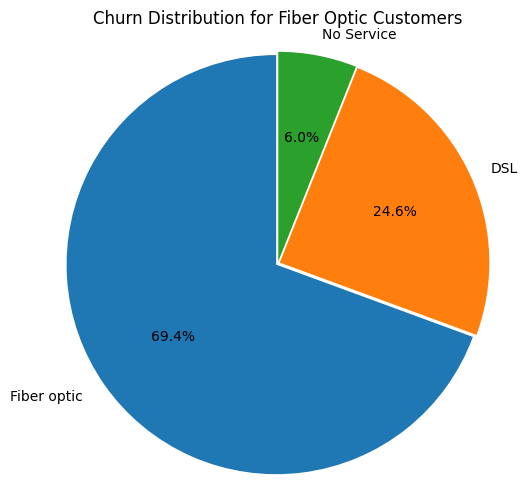

The number of people who left service using Fiber Optic: 1297 out of 3096
The number of people who left service using DSL: 459 out of 2421
The number of people who left service using no internet service: 113 out of 1526


In [16]:
fiber_churn_yes = analysis_data[((analysis_data['InternetService'] == 'Fiber optic')) & (analysis_data['Churn'] == 'Yes')]
dsl_churn_yes = analysis_data[((analysis_data['InternetService'] == 'DSL')) & (analysis_data['Churn'] == 'Yes')]
no_internet_churn = analysis_data[((analysis_data['InternetService'] == 'No')) & (analysis_data['Churn'] == 'Yes')]


sizes = [len(fiber_churn_yes), len(dsl_churn_yes),len(no_internet_churn)]
labels = ['Fiber optic ', 'DSL','No Service']

circle_analysis(sizes=sizes,title="Churn Distribution for Fiber Optic Customers",labels=labels)
print(f"The number of people who left service using Fiber Optic: {len(fiber_churn_yes)} out of {analysis_data['InternetService'].value_counts()[0]}")
print(f"The number of people who left service using DSL: {len(dsl_churn_yes)} out of {analysis_data['InternetService'].value_counts()[1]}")
print(f"The number of people who left service using no internet service: {len(no_internet_churn)} out of {analysis_data['InternetService'].value_counts()[2]}")

As we can see those who are using Fibre Optics are more to leave

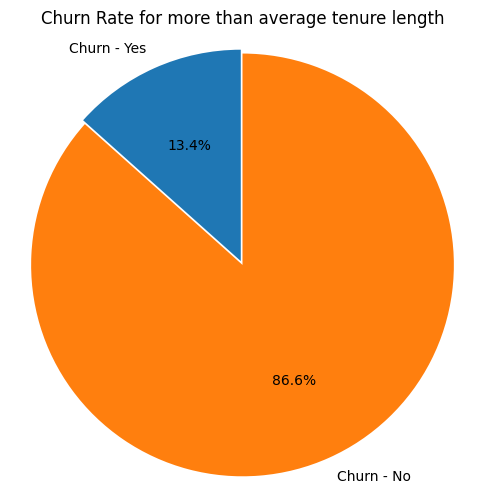

At Average tenure length at which Churn rate is very low is minimun 29.0 days


In [17]:
average_tenure_length = analysis_data['tenure'].median()
average_tenure_length 
average_tenure_length_yes = analysis_data[(analysis_data['tenure'] >= average_tenure_length) & (analysis_data['Churn'] == 'Yes')]
average_tenure_length_no = analysis_data[(analysis_data['tenure']>= average_tenure_length) & (analysis_data['Churn'] == 'No')]
average_tenure_length_yes_count = len(average_tenure_length_yes)
average_tenure_length_no_count = len(average_tenure_length_no)
sizes = [average_tenure_length_yes_count, average_tenure_length_no_count]
labels = ['Churn - Yes', 'Churn - No']

circle_analysis(sizes=sizes,title="Churn Rate for more than average tenure length",labels = labels)
print(f"At Average tenure length at which Churn rate is very low is minimun {average_tenure_length} days")

So Those who have tenure at least 29 days have 86.6% not to drop services 

### Distribution For Online Security

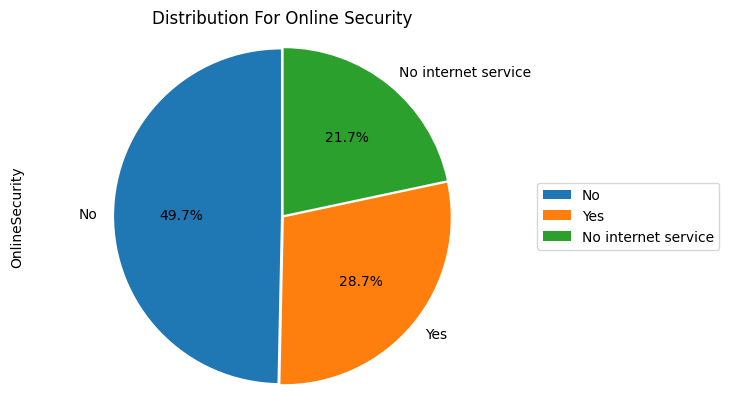

In [18]:
circle_draw(analysis_data['OnlineSecurity'],title='Distribution For Online Security')

In [19]:
analysis_data['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

#### Churning Rate Yes for Different Security service

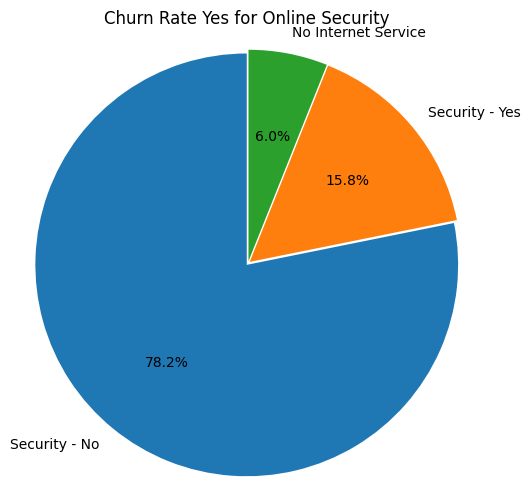

The number of people who left the service with no online security are 1461 out of 3498 
The number of people who left the service with online security are 295 out of 2019 
The number of people who left the service with no internet service are 113 out of 1526 


In [20]:
security_no = analysis_data[(analysis_data['OnlineSecurity']=='No') & (analysis_data['Churn'] == 'Yes')]
security_yes = analysis_data[(analysis_data['OnlineSecurity']=='Yes') & (analysis_data['Churn'] == 'Yes')]
security_no_service = analysis_data[(analysis_data['OnlineSecurity']=='No internet service') & (analysis_data['Churn'] == 'Yes')]

# Calculate lengths of different categories
sizes = [len(security_no), len(security_yes), len(security_no_service)]
labels = ['Security - No', 'Security - Yes', 'No Internet Service']

# Call the circle_analysis function
circle_analysis(sizes=sizes, title="Churn Rate Yes for Online Security", labels=labels)

print(f"The number of people who left the service with no online security are {len(security_no)} out of {analysis_data['OnlineSecurity'].value_counts()[0]} ")
print(f"The number of people who left the service with online security are {len(security_yes)} out of {analysis_data['OnlineSecurity'].value_counts()[1]} ")
print(f"The number of people who left the service with no internet service are {len(security_no_service)} out of {analysis_data['OnlineSecurity'].value_counts()[2]} ")

So we can see Those who Majorly dont use Security service have very high chunking rate in comparision of those who have security

### Different types of Contract

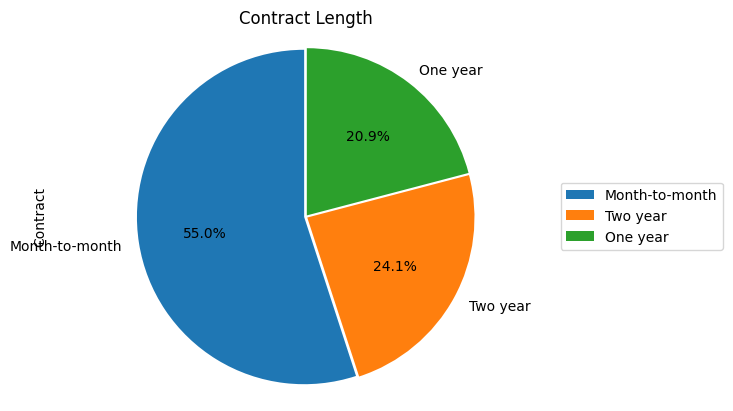

In [21]:
circle_draw(data_series=analysis_data['Contract'],title='Contract Length')


In [22]:
analysis_data["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

#### Churning Rate Yes for Different types of `Contract`

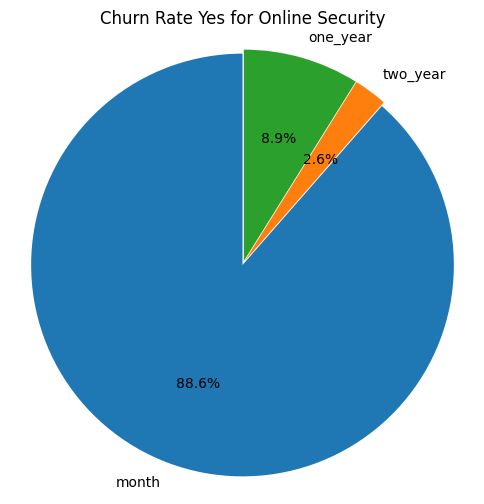

The number of people who left the service with month to month contact are 1655 out of 3875 
The number of people who left the service with two year contract are 48 out of 1695 
The number of people who left the service with one year contract are 166 out of 1473 


In [23]:
month = analysis_data[(analysis_data['Contract']=='Month-to-month') & (analysis_data['Churn'] == 'Yes')]
two_year = analysis_data[(analysis_data['Contract']=='Two year') & (analysis_data['Churn'] == 'Yes')]
one_year = analysis_data[(analysis_data['Contract']=='One year') & (analysis_data['Churn'] == 'Yes')]

# Calculate lengths of different categories
sizes = [len(month), len(two_year), len(one_year)]
labels = ['month', 'two_year', 'one_year']

# Call the circle_analysis function
circle_analysis(sizes=sizes, title="Churn Rate Yes for Online Security", labels=labels)

print(f"The number of people who left the service with month to month contact are {len(month)} out of {analysis_data['Contract'].value_counts()[0]} ")
print(f"The number of people who left the service with two year contract are {len(two_year)} out of {analysis_data['Contract'].value_counts()[1]} ")
print(f"The number of people who left the service with one year contract are {len(one_year)} out of {analysis_data['Contract'].value_counts()[2]} ")

So we can see people with month to month contract have high chunking rate

### Tech-support Distribution

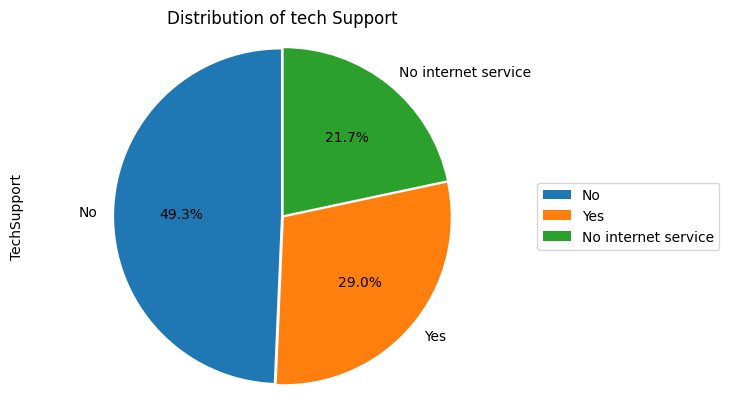

In [24]:
circle_draw(data_series=analysis_data['TechSupport'],title="Distribution of tech Support")

In [25]:
analysis_data['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

#### Let's see how Tech Support is affecting the Chunk Rate

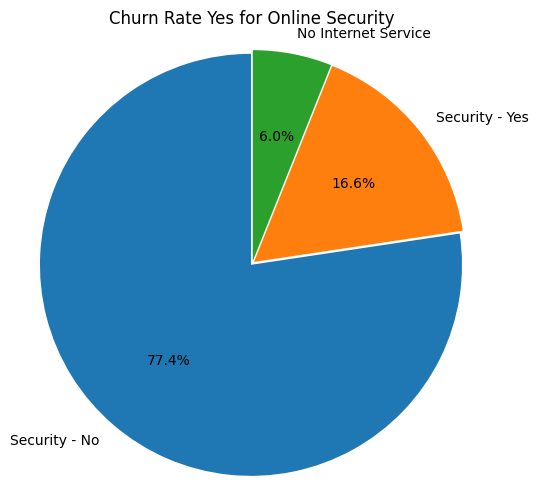

The number of people who left the service with no Tech support are 1446 out of 3473 
The number of people who left the service with Tech support are 310 out of 2044 
The number of people who left the service with no internet service are 113 out of 1526 


In [26]:
support_no = analysis_data[(analysis_data['TechSupport']=='No') & (analysis_data['Churn'] == 'Yes')]
support_yes = analysis_data[(analysis_data['TechSupport']=='Yes') & (analysis_data['Churn'] == 'Yes')]
support_no_service = analysis_data[(analysis_data['TechSupport']=='No internet service') & (analysis_data['Churn'] == 'Yes')]

# Calculate lengths of different categories
sizes = [len(support_no), len(support_yes), len(support_no_service)]
labels = ['Security - No', 'Security - Yes', 'No Internet Service']

# Call the circle_analysis function
circle_analysis(sizes=sizes, title="Churn Rate Yes for Online Security", labels=labels)

print(f"The number of people who left the service with no Tech support are {len(support_no)} out of {analysis_data['TechSupport'].value_counts()[0]} ")
print(f"The number of people who left the service with Tech support are {len(support_yes)} out of {analysis_data['TechSupport'].value_counts()[1]} ")
print(f"The number of people who left the service with no internet service are {len(support_no_service)} out of {analysis_data['TechSupport'].value_counts()[2]} ")

People with no Tech support have higher Chunk Rate

### Distribution for OnlineBackup

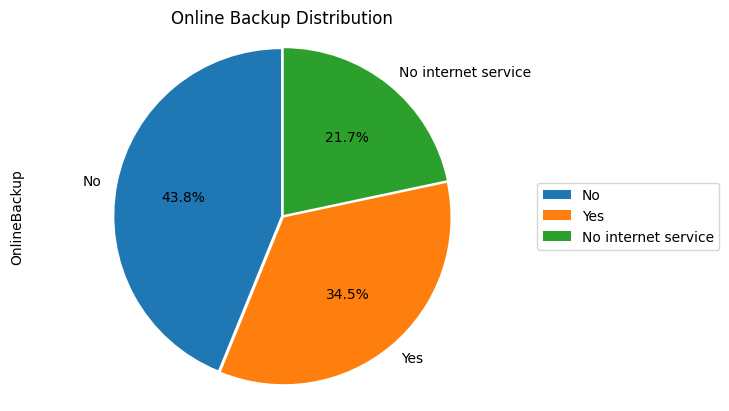

In [27]:
circle_draw(data_series=analysis_data['OnlineBackup'],title="Online Backup Distribution")

### Chunk Rate for Online Backup Distribution

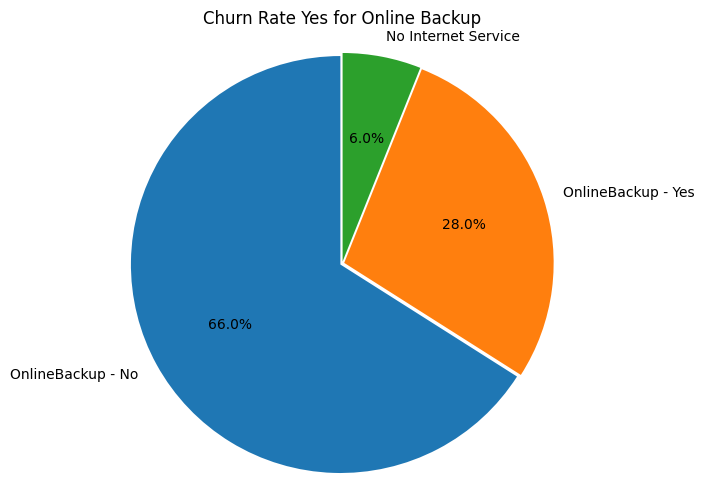

The number of people who left the service with no OnlineBackup are 1233 out of 3088 
The number of people who left the service with OnlineBackup are 523 out of 2429 
The number of people who left the service with no internet service are 113 out of 1526 


In [28]:
backup_no = analysis_data[(analysis_data['OnlineBackup']=='No') & (analysis_data['Churn'] == 'Yes')]
backup_yes = analysis_data[(analysis_data['OnlineBackup']=='Yes') & (analysis_data['Churn'] == 'Yes')]
support_no_service = analysis_data[(analysis_data['OnlineBackup']=='No internet service') & (analysis_data['Churn'] == 'Yes')]

# Calculate lengths of different categories
sizes = [len(backup_no), len(backup_yes), len(support_no_service)]
labels = ['OnlineBackup - No', 'OnlineBackup - Yes', 'No Internet Service']

# Call the circle_analysis function
circle_analysis(sizes=sizes, title="Churn Rate Yes for Online Backup", labels=labels)

print(f"The number of people who left the service with no OnlineBackup are {len(backup_no)} out of {analysis_data['OnlineBackup'].value_counts()[0]} ")
print(f"The number of people who left the service with OnlineBackup are {len(backup_yes)} out of {analysis_data['OnlineBackup'].value_counts()[1]} ")
print(f"The number of people who left the service with no internet service are {len(support_no_service)} out of {analysis_data['OnlineBackup'].value_counts()[2]} ")